In [92]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
import numpy as np
from scipy import integrate

In [93]:
def root_3(x):
    return x**(1/3)

In [94]:
def third_fun(x):
    return 4*x*((1-x)**3)

In [95]:
x_1 = np.linspace(0,8,100)
x_2 = np.linspace(0,np.pi,100)
x_3 = np.linspace(0,1,100)

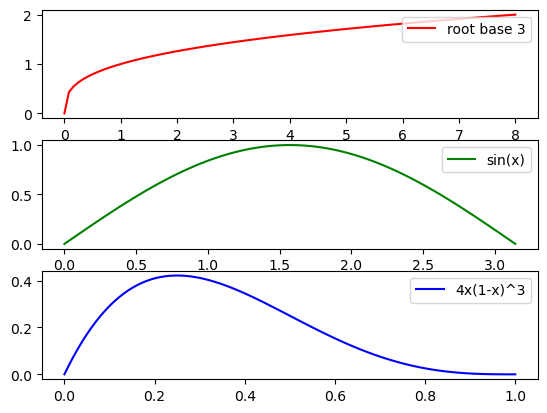

In [96]:
#plotting the relevant functions

fig, ax = plt.subplots(3,1)
ax[0].plot(x_1,root_3(x_1), label="root base 3", color="r")
ax[1].plot(x_2,np.sin(x_2), label = "sin(x)", color="g")
ax[2].plot(x_3,third_fun(x_3), label = "4x(1-x)^3", color="b")

ax[0].legend(loc='upper right')
ax[1].legend()
ax[2].legend()

In [97]:
#n-number of features, func-function,x1-start of the integral range, x2-end of the integral range, M-supremum of the function
def monte_carlo_approximator(n,func,x2,M,x1=0):
    rng = np.random.default_rng()
    
    points = rng.random((n,2))
    points[:,0] = x1 + points[:,0]*(x2-x1)
    points[:,1] = points[:,1]*M
    y = func(points[:,0])
    
    C = np.sum(y>points[:,1])
    approx = C/n*(x2-x1)*M
    return approx

In [98]:
def k_sim(k,n,func,x2,M,x1=0):
    attempts = []
    for i in range(k):
        attempts.append(monte_carlo_approximator(n,func,x2,M,x1))
    return np.array(attempts)

In [103]:
def make_plot(k,max_n,min_n,n_int,func,x2,M,x1=0,inc_avg=False,true_val=None):
    size = 10/k
    n=min_n
    fig, ax = plt.subplots()
    while n<=max_n:
        n_array = np.full(k,n)
        simulations = k_sim(k,n,func,x2,M,x1)
        ax.scatter(n_array,simulations,color='b',s=size)
        if inc_avg:
            ax.scatter([n],np.mean(simulations),color='r',s=10)
        n+=n_int
    if true_val is not None:
        ax.plot([0,max_n],[true_val,true_val], color='g')
    return fig,ax

In [112]:
def make_plot_ax(ax,k,max_n,min_n,n_int,func,x2,M,x1=0,inc_avg=False,true_val=None):
    size = 10/k
    n=min_n
    while n<=max_n:
        n_array = np.full(k,n)
        simulations = k_sim(k,n,func,x2,M,x1)
        ax.scatter(n_array,simulations,color='b',s=size)
        if inc_avg:
            ax.scatter([n],np.mean(simulations),color='r',s=10)
        n+=n_int
    if true_val is not None:
        ax.plot([0,max_n],[true_val,true_val], color='g')

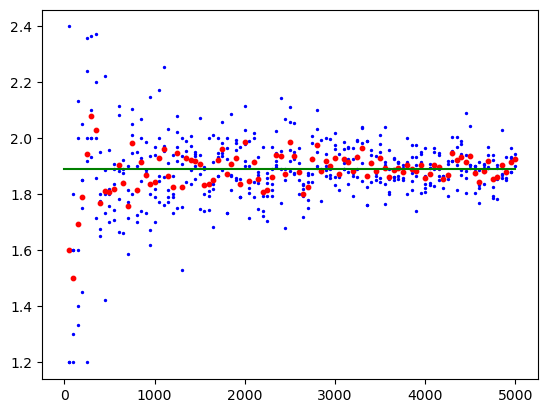

In [104]:
a, _ = integrate.quad(root_3,0,2)
fig,ax = make_plot(k=5,max_n=5000,min_n=50,n_int=50,func=root_3,x2=2,M=5,x1=0,inc_avg=True,true_val=a)

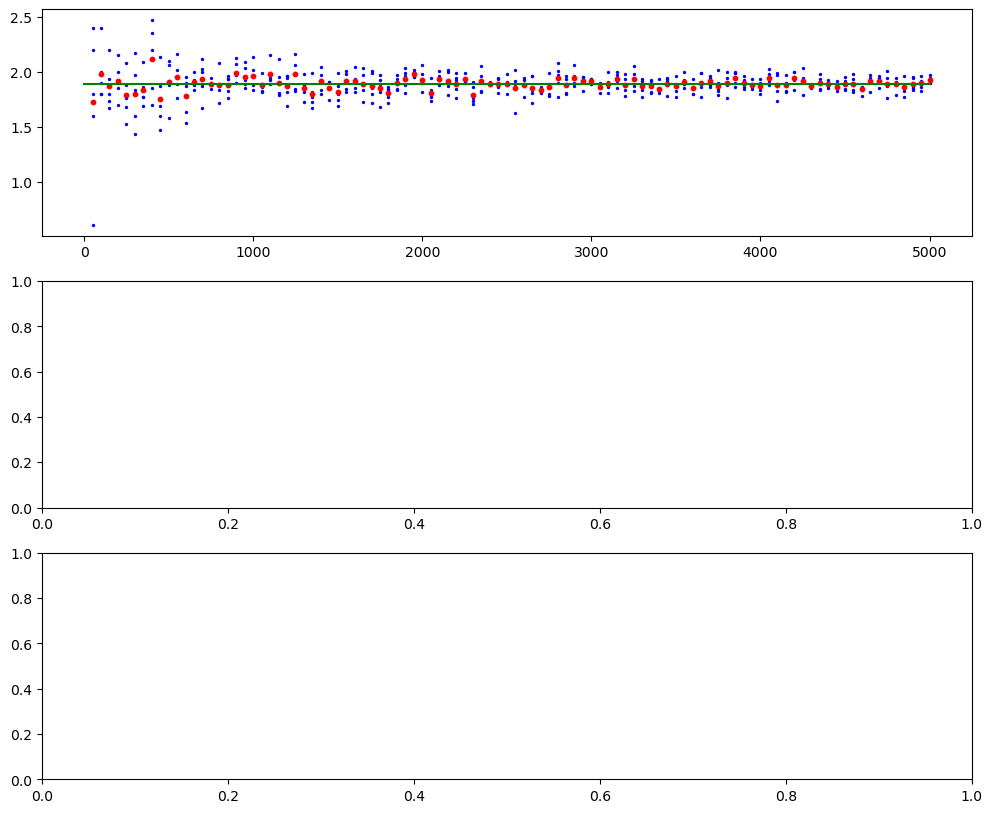

In [129]:
a, _ = integrate.quad(root_3, 0, 2)
fig,ax = plt.subplots(3,1,figsize=(12,10))
make_plot_ax(ax=ax[0],k=5, max_n=5000, min_n=50, n_int=50, func=root_3, x2=2, M=5, x1=0, inc_avg=True, true_val=a)
plt.show()

In [ ]:
main_fig, (ax1,ax2) = plt.subplots(1,2)
_, custom_ax = make_plot(k=5, max_n=5000, min_n=50, n_int=50, func=root_3, x2=2, M=5, x1=0, inc_avg=True, true_val=a)